In [1]:
import numpy as np

In [2]:
pts1 = np.random.randn(3,2)
pts2 = np.random.randn(3,2)

In [3]:
diff = pts1 - pts2
np.sqrt(np.sum(diff ** 2))

2.771503543447155

In [4]:
np.linalg.norm(pts1 - pts2)

2.771503543447155

In [5]:
np.linalg.norm(pts1.flatten() - pts2.flatten())

2.771503543447155

In [1]:
from sys import path
path.append("../")

In [7]:
from utils.nn_utils import create_flow_matching
import torch

def ode_solve(z0, t0, t1, model):
    n_steps = 1000

    h = (t1 - t0) / n_steps
    t = t0
    z = z0

    zs = []

    for i_step in range(n_steps):
        z = z + h[:, None] * model(t, z)
        zs += [z.cpu().detach().numpy()]
        t = t + h

    return zs

device = torch.device("cpu")
v_t = create_flow_matching(device)
with open("../../weights/smiley_face_weights.pt", "rb") as f:
    v_t.load_state_dict(torch.load(f, map_location=device))

In [8]:
x0 = torch.randn(512, 2, device=device)
t0 = torch.zeros_like(x0)[:,0].to(device)
t1 = torch.ones_like(x0)[:,0].to(device)
approx = ode_solve(x0, t0, t1, v_t)

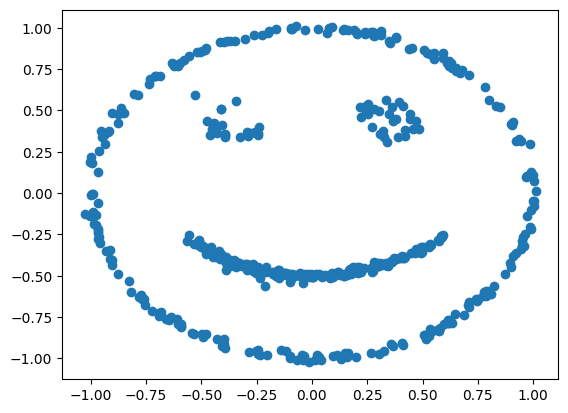

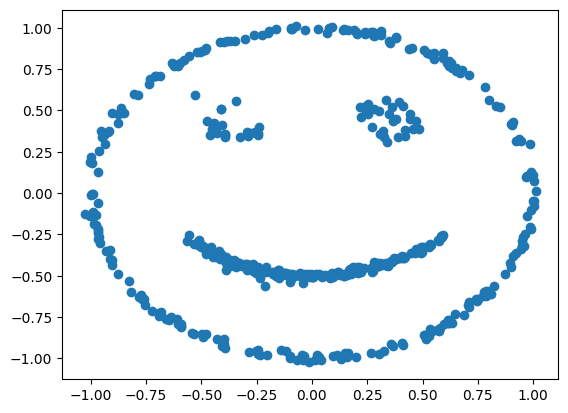

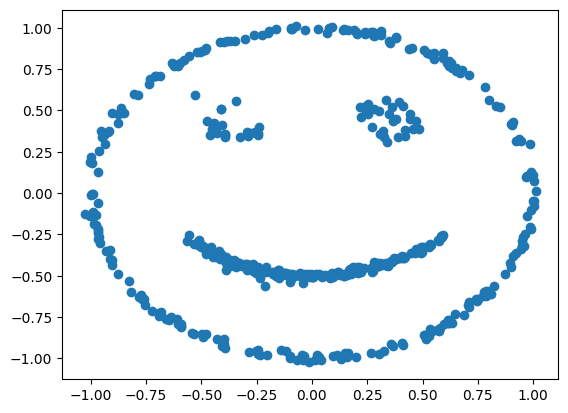

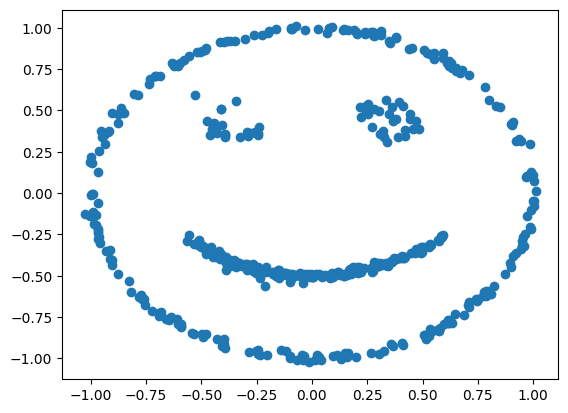

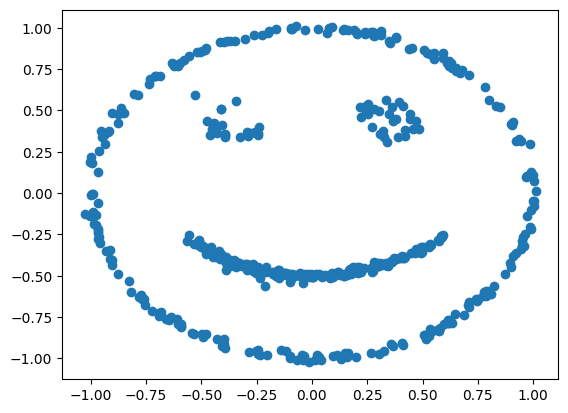

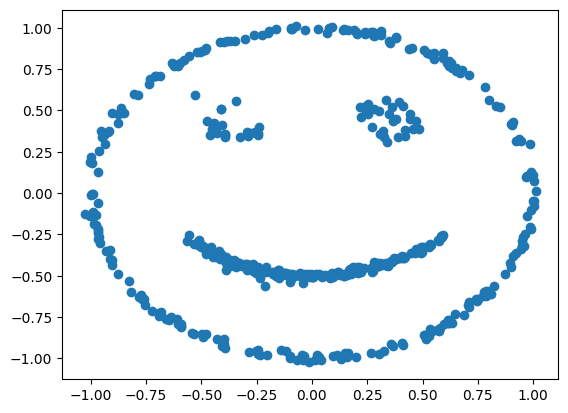

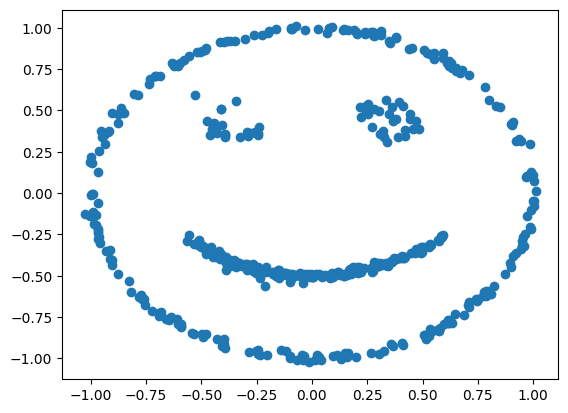

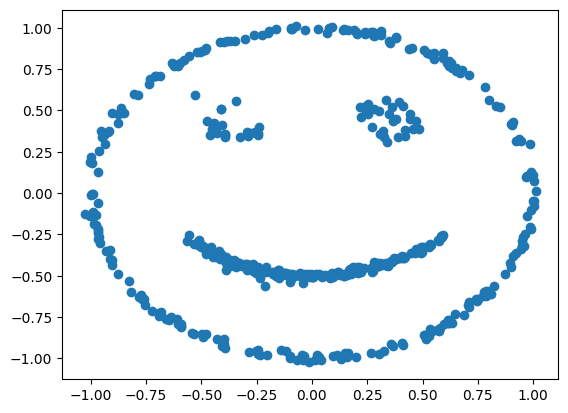

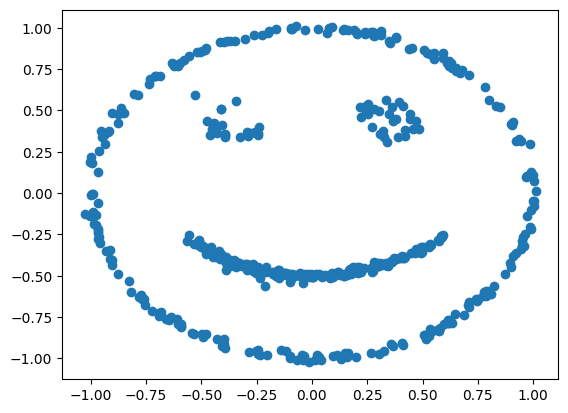

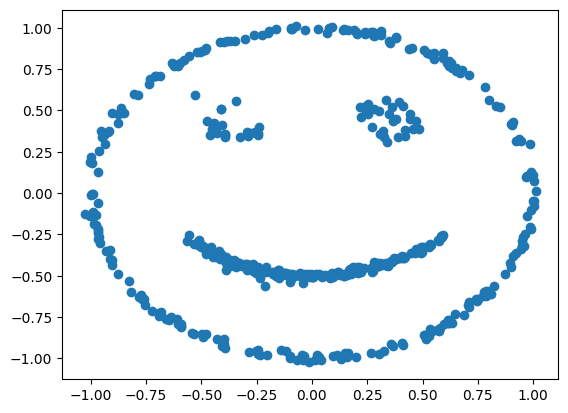

In [9]:
from matplotlib import pyplot as plt

for i in range(len(approx) - 10, len(approx)):
  plt.scatter(approx[-1][:,0], approx[-1][:,1])
  plt.show()